# Term-Project1 최종보고서: 교통 사고에 대한 전반적 분석

학번: 2024105239

학과: 소프트웨어융합학과

학년: 1학년

이름: 김민기

## 1. 주제 및 주제 선정 이유
주제: 교통 사고에 대한 전반적 분석

주제 선정 이유: 수능이 끝난 후 겨울방학에 운전면허증을 따는 친구를 많이 보았다. 이것을 보고 교통사고가 어떤 시간에, 어떤 연령대에서, 어느 지역에서 가장 많이 발생하는지 관심이 생겼다. 따라서 이번 Term-Project를 통해 해당 주제를 탐구해 볼 것이다.

## 2. 가설 정의
### 가설1. 교통사고는 저녁 6시~ 8시 경에 가장 많이 발생할 것이다.
-낮 시간보다 퇴근 시간에 차들이 많이 다녀 교통사고가 많이 날 것 같아 해당 가설을 선정하였다.
### 가설2. 교통사고를 가해자가 가장 많은 연령대는 (21~30)살일 것이다.
-면허증을 취득한지 얼마 되지 않아 운전이 미숙해 사고를 많이 낼 것 같아 해당 가설을 선정하였다.
### 가설3. 남성의 교통사고 사상자의 비율은 나이대가 많을수록 줄어들 것이다.
-남성이 나이가 들수록 조심스럽게 운전하려는 경향이 강해져 사상자가 점차 줄어들 것 같아 해당 가설을 선정하였다.
### 가설4. 교통사고는 금요일에 가장 많이 발생할 것이다.
-금요일은 평일의 마지막 날로 회식이 많은 날이고 주말을 맞아 놀러가는 사람들도 있다. 따라서 전반적으로 음주운전 및 차량 통행량이 많아 사고가 가장 많이 일어날 것으로 예상되어 해당 가설을 선정하였다.

## 3. 분석할 데이터 출처 및 내용설명

모든 분석 자료는 2022년 기준 내용이 담긴 csv 파일을 사용하였다.

- 가설1, 4 (2022년 1월 ~ 12월) 요일별 교통 사고 건수와 시간별 교통 사고 건수
https://kosis.kr/statHtml/statHtml.do?orgId=132&tblId=DT_V_MOTA_012&vw_cd=MT_ZTITLE&list_id=C_5&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
- 가설 2 (2022년 1월 ~ 12월) 연령대별 교통 사고 가해자의 수
https://kosis.kr/statHtml/statHtml.do?orgId=132&tblId=DT_V_MOTA_021&vw_cd=MT_ZTITLE&list_id=C_5&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
- 가설 3 (2022년 1월 ~ 12월) 연령층별 성별 사상자의 수
https://kosis.kr/statHtml/statHtml.do?orgId=132&tblId=DT_V_MOTA_053&vw_cd=MT_ZTITLE&list_id=C_5&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### 1. 요일별 교통 사고 건수와 시간별 교통 사고 건수
- 제공기관(출처): 경찰청
- 데이터 최종 수정일자: 2023년 7월 6일
- 설명: 이 자료는 시간대별로 교통 사고의 건수를 월별, 요일별로 상세히 나타내주는 자료이다. 현재 이 자료는 2005년부터 2022년 까지의 요일별, 시간대별 교통 사고현황을 볼 수 있다. (이번 Term-Project에서는 2022년도의 데이터만 사용할 예정이다.)

### 2. 가해자 연령층별 교통 사고 가해자의 수
- 제공기관(출처): 경찰청
- 데이터 최종 수정일자: 2023년 7월 26일
- 설명: 이 자료는 가해자 연령별로 교통사고 발생건수와 그로 인한 사망자수와 부상자수를 상세히 나타내주는 자료이다. 현재 이 자료는 2005년부터 2022년 까지의 연령층별 교통사고 현황을 볼 수 있다. (이번 Term-Project 에서는 2022년도의 데이터만 사용할 예정이다.)

### 3. 연령층별 성별 사상자
- 제공기관(출처): 경찰청
- 데이터 최종 수정일자: 2023년 7월 6일
- 설명: 이 자료는 연령층별 교통사고로 인한 남녀 부상자와 사망자의 수를 상세히 나타내주는 자료이다. 현재 이 자료는 2005년부터 2022년까지의 연령층별 성별 사상자의 현황을 볼 수 있다.(이번 Term-Project 에서는 2022년도의 데이터만 사용할 예정이다.)

### 3-1. 가설 1 데이터 분석

In [1]:
import pandas as pd
df1 = pd.read_csv("./요일별_시간대별_교통사고_20240514202420.csv", encoding = 'cp949')
#  사망자수, 부상자수를 제외한 그래프로 변환하기
df1 = df1.iloc[:, 0:4]
df1.rename(columns = {'2022': '사고건수(건)'}, inplace = True)
# 월별(1)의 값이 전체인 행만 분류하기
df1 = df1[df1['월별(1)'] == '전체']
# 시간대별 사고의 발생 합을 나타내주는 표로 변환하기
df1['사고건수(건)'] = df1['사고건수(건)'].astype(int)
df1 = df1.groupby(by = ['시간대별(1)'])[['사고건수(건)']].sum()
df1 = df1.reset_index()
df1

,시간대별(1),사고건수(건)
0,00시-02시,6784
1,02시-04시,3569
2,04시-06시,4358
3,06시-08시,10657
4,08시-10시,20490
5,10시-12시,20007
6,12시-14시,22047
7,14시-16시,23234
8,16시-18시,26537
9,18시-20시,27433


### 3-2 가설 2 데이터 분석

In [2]:
import pandas as pd
df2 = pd.read_csv("./가해자_연령층별_교통사고_20240514202601.csv", encoding = 'cp949')
# 사망자수, 부상자수를 제외한 그래프로 변환하기
df2 = df2.iloc[:, 0:3]
df2.rename(columns = {'2022': '사고건수(건)'}, inplace = True)
# 월별(1)이 전체인 행만 분류하기
df2 = df2[df2['월별(1)'] == '전체']
df2['사고건수(건)'] = df2['사고건수(건)'].astype(int)
df2 = df2.reset_index()
del df2['index']
df2

,가해자연령층별(1),월별(1),사고건수(건)
0,20세이하,전체,6508
1,21-30세,전체,26904
2,31-40세,전체,28402
3,41-50세,전체,33915
4,51-60세,전체,44581
5,61-64세,전체,19160
6,65-70세,전체,19399
7,71세이상,전체,15253
8,불명,전체,2714


### 3-3 가설 3 데이터 분석

In [3]:
import pandas as pd
df3 = pd.read_csv("./연령층별_성별_사상자_20240526133738.csv", encoding = 'cp949')
# 사망자수와 부상자수를 합친 사상자 수를 구하고 합치기
df3.rename(columns = {'2022': '사망자수(명)', '2022.1': '부상자수(명)'}, inplace = True)
df3 = df3[df3['월별(1)'] == '전체']

df3['사망자수(명)'] = df3['사망자수(명)'].astype(int)
df3['부상자수(명)'] = df3['부상자수(명)'].astype(int)
df3['사상자수(명)'] = df3['사망자수(명)'] + df3['부상자수(명)']
# 연령층과 성별이 불명인 데이터는 가설3의 통계분석에서 사용하지 않음.

In [4]:
# 남성의 데이터만 분류해서 출력
male = df3[df3['성별(1)'] == '남']
male = male.reset_index()
del male['index']
male

,연령층별(1),성별(1),월별(1),사망자수(명),부상자수(명),사상자수(명)
0,12세이하,남,전체,11,6530,6541
1,13-20세,남,전체,63,8559,8622
2,21-30세,남,전체,195,33008,33203
3,31-40세,남,전체,164,32962,33126
4,41-50세,남,전체,217,30942,31159
5,51-60세,남,전체,352,29456,29808
6,61-64세,남,전체,192,11386,11578
7,65-70세,남,전체,264,11682,11946
8,71세이상,남,전체,551,11309,11860
9,불명,남,전체,0,42,42


In [5]:
# 여성의 데이터만 분류해서 출력
female = df3[df3['성별(1)'] == '여']
female = female.reset_index()
del female['index']
female

,연령층별(1),성별(1),월별(1),사망자수(명),부상자수(명),사상자수(명)
0,12세이하,여,전체,7,4859,4866
1,13-20세,여,전체,18,4938,4956
2,21-30세,여,전체,30,17919,17949
3,31-40세,여,전체,31,16981,17012
4,41-50세,여,전체,45,17715,17760
5,51-60세,여,전체,90,19696,19786
6,61-64세,여,전체,62,7582,7644
7,65-70세,여,전체,95,7421,7516
8,71세이상,여,전체,348,8780,9128
9,불명,여,전체,0,36,36


### 3-4 가설 4 데이터 분석

In [6]:
import pandas as pd
df4 = pd.read_csv("./요일별_시간대별_교통사고_20240514202420.csv", encoding = 'cp949')
#  사망자수, 부상자수를 제외한 그래프로 변환하기
df4 = df4.iloc[:, 0:4]
df4.rename(columns = {'2022': '사고건수(건)'}, inplace = True)
# 월별(1)의 값이 전체인 행만 분류하기
df4 = df4[df4['월별(1)'] == '전체']
df4['사고건수(건)'] = df4['사고건수(건)'].astype(int)
df4 = df4.groupby(by = ['요일별(1)'])[['사고건수(건)']].sum()
df4 = df4.reset_index()

# 두개의 행을 바꾸기 위한 함수
def swap(df4, row1, row2):
    df4.iloc[row1], df4.iloc[row2] = df4.iloc[row2].copy(), df4.iloc[row1].copy()
    return df4

# 요일을 일, 월, 화, 수, 목, 금, 토 순서대로 바꾸기
df4 = swap(df4, 0, 4)
df4 = swap(df4, 1, 3)
df4 = swap(df4, 2, 6)
df4 = swap(df4, 3, 6)
df4 = swap(df4, 4, 6)
df4 = swap(df4, 5, 6)
df4




,요일별(1),사고건수(건)
0,일,21289
1,월,27943
2,화,28804
3,수,28861
4,목,29268
5,금,31945
6,토,28726


## 4. 가설별 분석 결과

### 4-1 그래프 그리기와 분석

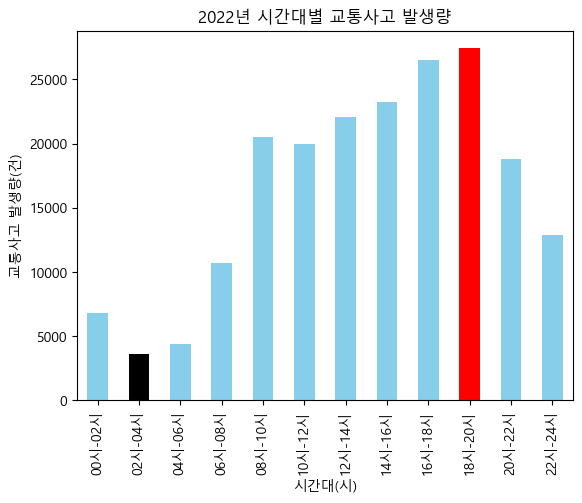

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프에 한글을 제대로 변환해주기 위한 코드
plt.rc('font', family = 'Malgun Gothic')
# 최댓값과 최솟값 강조표시(최대 : 빨간색, 최소: 검정색)
ax = df1.groupby(by = ['시간대별(1)'])['사고건수(건)'].sum().plot.bar(color=['skyblue', 'black', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'red', 'skyblue', 'skyblue'])
plt.title('2022년 시간대별 교통사고 발생량')
ax.set_xlabel('시간대(시)')
ax.set_ylabel('교통사고 발생량(건)')
plt.show()

### 4-1 그래프 분석
- 가설: 교통사고는 저녁 6시~8시 경에 가장 많이 발생할 것이다.

- 실제 결과: 실제로 교통사고는 직장인들의 퇴근시간인 저녁 6시 ~ 8시 경에 27000건을 넘길 정도로 가장 사건사고가 많이 발생하였다. 2시 ~ 4시 사이에도 마찬가지로 25000건이 넘는 사고 건수를 보였고 새벽 시간대인 00시 ~ 04시까지는 상대적으로 적은 교통 사고 건수를 보였다. 교통 사고 건수는 02시 ~ 20시 까지 증가 형태를 띄었다가 20시 ~ 02시 까지 점차 감소하는 형태를 띄고 있다.  (가설이 맞음)

### 4-2 가설 2 분석결과

### 4-2 그래프 그리기와 분석

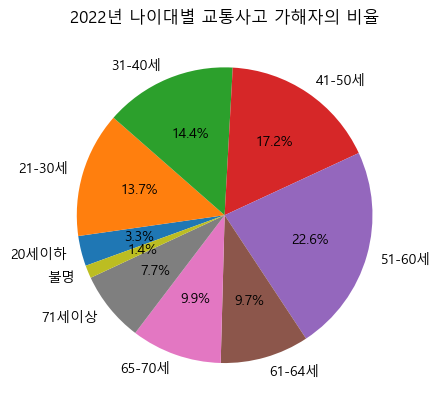

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프에 한글을 제대로 변환해주기 위한 코드
plt.rc('font', family = 'Malgun Gothic')
# 각 나이대별 사고 가해자의 비율을 나타내주는 코드(각 그래프의 비율은 소수 첫째짜리 까지만 나타냄.)
total_accidents = df2['사고건수(건)'].sum()
accidentlow20 = round((df2['사고건수(건)'].values[0] / total_accidents) * 100, 1)
accident20 = round((df2['사고건수(건)'].values[1] / total_accidents) * 100, 1)
accident30 = round((df2['사고건수(건)'].values[2] / total_accidents) * 100, 1)
accident40 = round((df2['사고건수(건)'].values[3] / total_accidents) * 100, 1)
accident50 = round((df2['사고건수(건)'].values[4] / total_accidents) * 100, 1)
accident60 = round((df2['사고건수(건)'].values[5] / total_accidents) * 100, 1)
accident60_2 = round((df2['사고건수(건)'].values[6] / total_accidents) * 100, 1)
accidentup70 = round((df2['사고건수(건)'].values[7] / total_accidents) * 100, 1)
unknown = round((df2['사고건수(건)'].values[8] / total_accidents) * 100, 1)

ratio = [accidentlow20, accident20, accident30, accident40, accident50, accident60, accident60_2, accidentup70, unknown]
# 각 나이대 항목을 df2 그래프에서 가져오게 해주는 코드
age1 = df2['가해자연령층별(1)'].values[0]
age2 = df2['가해자연령층별(1)'].values[1]
age3 = df2['가해자연령층별(1)'].values[2]
age4 = df2['가해자연령층별(1)'].values[3]
age5 = df2['가해자연령층별(1)'].values[4]
age6 = df2['가해자연령층별(1)'].values[5]
age7 = df2['가해자연령층별(1)'].values[6]
age8 = df2['가해자연령층별(1)'].values[7]
age9 = df2['가해자연령층별(1)'].values[8]
labels = [age1, age2, age3, age4, age5, age6, age7, age8, age9]
plt.pie(ratio, labels = labels, autopct = '%.1f%%', startangle = 200, counterclock = False)
plt.title('2022년 나이대별 교통사고 가해자의 비율')
plt.show()

### 4-2 그래프의 분석
- 가설: 교통사고 가해자가 가장 많은 연령대는 (21~30)살일 것이다.
- 실제 결과: 실제로 교통사고는 51 ~ 60살이 22.6%로 교통사고 가해자의 비율이 가장 높고 21~30살은 13.7%로 내가 예상했던 것과 달리 낮은 수치를 보였다.(가설이 틀림)

### 4-3 그래프 그리기와 분석

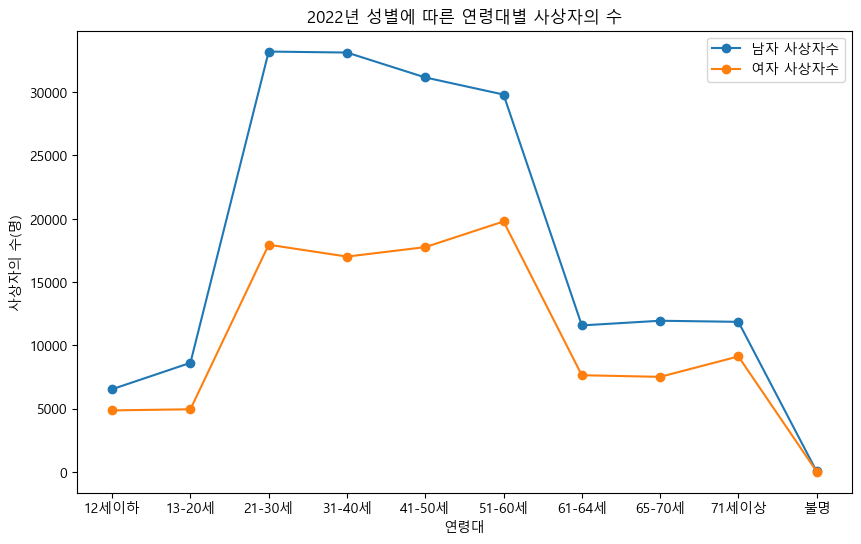

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#그래프에 한글을 제대로 표시하기 위한 설정
plt.rc('font', family = 'Malgun Gothic')

# age 그룹을 그래프에서 불러와 리스트에 넣기
age1 = df3['연령층별(1)'].values[0]
age2 = df3['연령층별(1)'].values[2]
age3 = df3['연령층별(1)'].values[4]
age4 = df3['연령층별(1)'].values[6]
age5 = df3['연령층별(1)'].values[8]
age6 = df3['연령층별(1)'].values[10]
age7 = df3['연령층별(1)'].values[12]
age8 = df3['연령층별(1)'].values[14]
age9 = df3['연령층별(1)'].values[16]
age10 = df3['연령층별(1)'].values[18]
age_groups = [age1, age2, age3, age4, age5, age6, age7, age8, age9, age10]
# 그래프 사이즈 설정
plt.figure(figsize=(10, 6))

# 남자 사상자의 수와 여자 사상자의 수로 꺾은선 그래프 만들기
ax = male.groupby(by = ['연령층별(1)'])['사상자수(명)'].sum()
bx = female.groupby(by = ['연령층별(1)'])['사상자수(명)'].sum()
plt.plot(age_groups, ax, marker = 'o', label = '남자 사상자수')
plt.plot(age_groups, bx, marker = 'o', label = '여자 사상자수')

# 그래프 정보 삽입
plt.title('2022년 성별에 따른 연령대별 사상자의 수')
plt.xlabel('연령대')
plt.ylabel('사상자의 수(명)')

# 범례 추가
plt.legend()
# x축 레이블 회전 설정
plt.xticks(rotation=0)
# 그래프 표시
plt.show()


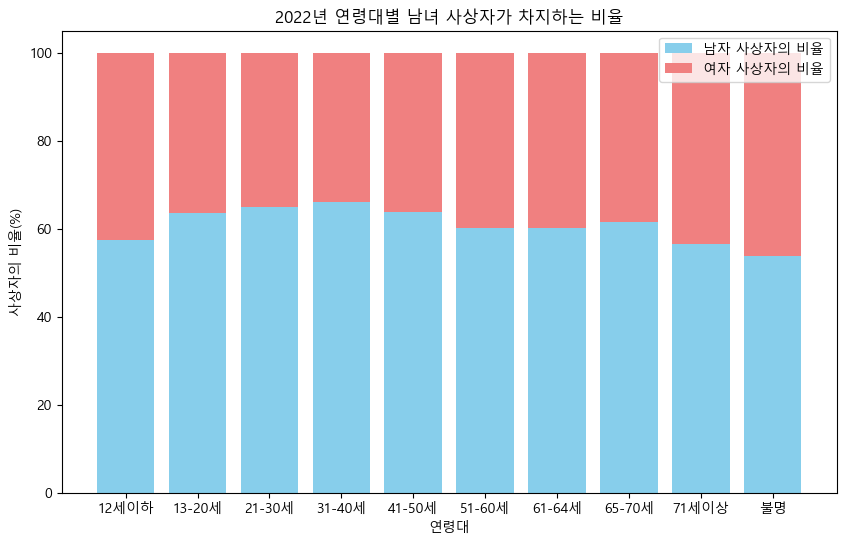

In [10]:
# 연령대별 남자 사상자가 차지하는 비율에 대한 추가 그래프
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 설정
age1 = df3['연령층별(1)'].values[0]
age2 = df3['연령층별(1)'].values[2]
age3 = df3['연령층별(1)'].values[4]
age4 = df3['연령층별(1)'].values[6]
age5 = df3['연령층별(1)'].values[8]
age6 = df3['연령층별(1)'].values[10]
age7 = df3['연령층별(1)'].values[12]
age8 = df3['연령층별(1)'].values[14]
age9 = df3['연령층별(1)'].values[16]
age10 = df3['연령층별(1)'].values[18]
age_groups = [age1, age2, age3, age4, age5, age6, age7, age8, age9, age10]

# 남성과 여성의 사상자 수를 리스트 형식으로 구하기
ax = list(male.groupby(by = ['연령층별(1)'])['사상자수(명)'].sum())
bx = list(female.groupby(by = ['연령층별(1)'])['사상자수(명)'].sum())

# 남성과 여성 사상자의 비율 구하기(for문 사용)
difference_male = []
difference_female = []
for i in range(len(ax)):
    total = ax[i] + bx[i]
    difference_male.append(round((ax[i] / total) * 100, 1))
    difference_female.append(round((bx[i] / total) * 100, 1))


# 비율 데이터를 배열로 변환
data1 = np.array(difference_male)
data2 = np.array(difference_female)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(age_groups, data1, label='남자 사상자의 비율', color='skyblue')
plt.bar(age_groups, data2, bottom=data1, label='여자 사상자의 비율', color='lightcoral')
plt.xlabel('연령대')
plt.ylabel('사상자의 비율(%)')
plt.title('2022년 연령대별 남녀 사상자가 차지하는 비율')
plt.legend(loc='best')
plt.show()

### 4-3 그래프 분석
- 가설: 남성의 교통사고 사상자의 비율은 나이대가 많을수록 줄어들 것이다.
- 실제 결과: 실제로 31~40세부터 남자 사상자의 비율이 조금씩 감소하는 경향이 보인다.추가로 남자 사상자의 비율이 모든 나이대에서 절반 넘게 웃도는 것을 볼 수 있다. (가설이 맞음)

### 4-4 그래프 그리기와 분석

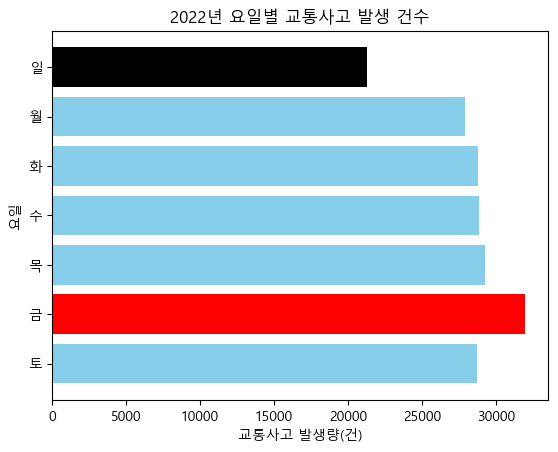

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# # 그래프에 한글을 제대로 표시하기 위한 설정
plt.rc('font', family='Malgun Gothic')

# 교통사고를 요일별로 정리하기
day1 = df4['요일별(1)'].values[0]
day2 = df4['요일별(1)'].values[1]
day3 = df4['요일별(1)'].values[2]
day4 = df4['요일별(1)'].values[3]
day5 = df4['요일별(1)'].values[4]
day6 = df4['요일별(1)'].values[5]
day7 = df4['요일별(1)'].values[6]
categories = [day1, day2, day3, day4, day5, day6, day7]
# 교통사고 발생량을 df4에서 불러오기
accident1 = df4['사고건수(건)'].values[0]
accident2 = df4['사고건수(건)'].values[1]
accident3 = df4['사고건수(건)'].values[2]
accident4 = df4['사고건수(건)'].values[3]
accident5 = df4['사고건수(건)'].values[4]
accident6 = df4['사고건수(건)'].values[5]
accident7 = df4['사고건수(건)'].values[6]
values = [accident1, accident2, accident3, accident4, accident5, accident6, accident7]
df = pd.DataFrame({'요일': categories, '교통사고 발생량(건)': values})

df['요일'] = pd.Categorical(df['요일'], categories=categories, ordered=True)
df = df.sort_values('요일', ascending=False)

colors = ['red' if x == df['교통사고 발생량(건)'].max() else 'black' if x == df['교통사고 발생량(건)'].min() else 'skyblue' for x in df['교통사고 발생량(건)']]

plt.barh(df['요일'], df['교통사고 발생량(건)'], color=colors)
plt.title('2022년 요일별 교통사고 발생 건수')
plt.xlabel('교통사고 발생량(건)')
plt.ylabel('요일')
plt.show()



### 4-4 그래프 분석
- 가설: 교통사고는 금요일에 가장 많이 발생할 것이다.
- 실제 결과: 교통사고는 금요일에 30000여건 넘게 가장 많이 발생하는 것으로 확인되고 일요일에 21000여건으로 가장 적게 발생한다는 것을 알게 되었다. (가설이 맞음)

## 5. 최종 결론

1. 교통사고의 발생시간: 가설에서 예측한 대로 실제로 직장인들의 퇴근 시간인 저녁 6시 ~ 8시에 27000여건을 웃돌 정도로 교통 사고가 많이 발생된다는 것을 분석을 통해서 얻었다. 또한 04시 ~ 20시까지의 교통사고 발생량은 증가추세를 보임과 20시 ~ 04시의 교통사고 발생량은 감소 추세를 보임을 추가로 알 수 있었다.(가설이 맞음)

2. 교통사고의 발생 연령대: 가설에서 예측한 바와 달리, 교통사고를 가장 많이 내는 연령대는 50 ~ 59세였다. 20 ~ 29세의 교통사고 비율은 내가 예상한 바와 달리 13.7%로 낮은 수치를 보였다. 또한 20살 이하에서 50~59살의 연령대에서 나이대가 많아질 수록 교통사고 발생 비율이 같이 높아진다는 부분을 추가로 알 수 있었다. 왜 이런 결과가 나왔는지 찾아보니 나이가 많을수록 인지능력이 저하되는 경향이 있어 판단능력이 저하되어 교통사고 발생률이 높아진다는 사실을 찾을 수 있었다.(가설이 틀림)

3. 남성의 교통사고 사상자의 비율: 가설에서 예측한 대로 나이대가 높아질 수록 남성의 교통사고 사상자의 비율이 조금씩 감소하는 경향을 보임을 알 수 있었다. (가설이 맞음)

4. 교통사고가 자주 발생하는 요일: 가설에서 예측한 대로 금요일에 교통사고가 30000여건이 넘게 발생하였다. 추가로 교통사고는 일요일에 가장 적게 발생하고 평일에는 월요일에서 금요일로 갈수록 교통사고 발생건수가 증가하는 경향이 있다는 것을 알 수 있었다. (가설이 맞음)

5. 분석으로 느낀점: 이번 Term-Project에서 분석을 하면서 교통사고가 많이 발생하는 요일과 시간을 알 수 있었다. 따라서 교통사고가 많이 발생하는 시간과 요일에 교통 정리를 하거나 음주운전 단속등을 집중해서 한다면 전반적인 교통사고를 줄일 수 있을 것이라 판단한다. 또한 교통사고 가해자의 비율은 51세 이상이 50%에 육박한다. 따라서 일정 연령 이상의 운전자의 경우에는 면허증 갱신 주기를 앞당겨야 한다. 또한, 인지능력 판단 검사등 갱신 조건을 까다롭게 바꿔 일정수준 이상의 인지능력을 가진 사람들이 운전을 할 수 있게 해야 한다고 판단한다. 이런 제안들을 국가나 지자체가 참고해서 시행한다면 교통사고 발생이 줄어들 것이라고 생각한다.

## 6. 참고 문헌 및 자료

1. https://dotsnlines.tistory.com/717
2. https://wikidocs.net/92114
3. https://luvris2.tistory.com/33
4. https://blog.naver.com/parksdatalab/223457852563
5. https://blog.naver.com/sgkim1/223103776323
6. https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/

## * 별첨

1. 가해자_연령층별_교통사고_20240514202601
2. 요일별_시간대별_교통사고_20240514202420
3. 연령층별_성별_사상자_20240526133738